<a href="https://colab.research.google.com/github/secutron/RunTime/blob/master/GPipe0View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### View - obj (texture)

In [1]:
_ = !sudo apt update
_ = !sudo wget https://github.com/mmatl/travis_debs/raw/master/xenial/mesa_18.3.3-0.deb
_ = !sudo dpkg -i ./mesa_18.3.3-0.deb || true
_ = !sudo apt install -f
_ = !git clone https://github.com/mmatl/pyopengl.git
_ = !pip install ./pyopengl
_ = !pip install pyrender

In [2]:
import os, sys, cv2
from os.path import join
os.environ["PYOPENGL_PLATFORM"] = "osmesa"
import numpy as np
import pickle
import trimesh
import pyrender
import matplotlib.pyplot as plt

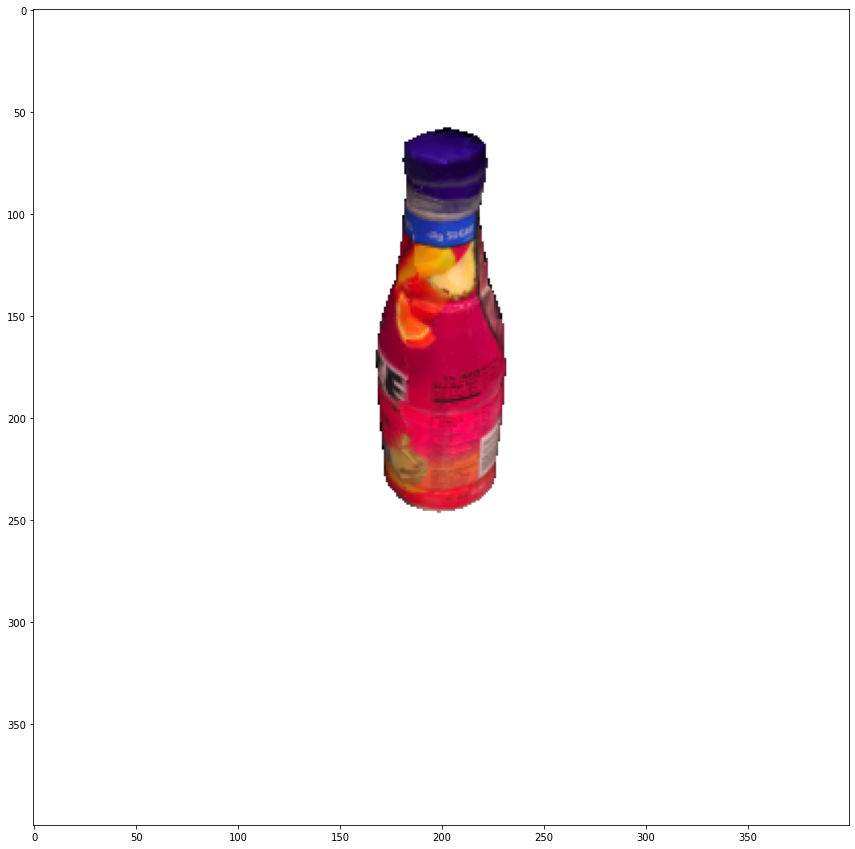

In [3]:
fuze_trimesh = trimesh.load('/content/drive/My Drive/GTask/VOCA/pyrender/examples/models/fuze.obj')
#fuze_trimesh = trimesh.load('/content/drive/My Drive/GTask/VOCA/animation_output/meshes/00000.obj')
#fuze_trimesh = trimesh.load('/content/drive/My Drive/animation_texture/hkim정면crop.obj')
mesh = pyrender.Mesh.from_trimesh(fuze_trimesh)
scene = pyrender.Scene()
scene.add(mesh)



#num_frames = sequence_vertices.shape[0]
#center = np.mean(sequence_vertices[0], axis=0)

#tmp = Mesh(sequence_vertices[0], template.f)
#tmp.set_texture_image('/content/drive/My Drive/animation_texture/meshes/hkim정면crop.png')




camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0)
s = np.sqrt(2)/2
camera_pose = np.array([
    [0.0, -s,   s,   0.3],
    [1.0,  0.0, 0.0, 0.0],
    [0.0,  s,   s,   0.35],
    [0.0,  0.0, 0.0, 1.0],
])
scene.add(camera, pose=camera_pose)
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                            innerConeAngle=np.pi/16.0,
                            outerConeAngle=np.pi/6.0)
scene.add(light, pose=camera_pose)

# Use OffscreenRenderer to get image perspectives.
r = pyrender.OffscreenRenderer(400, 400)
color, depth = r.render(scene)



#depth_proc = _preprocess_depth(depth)
#plt.figure()
#plt.subplot(1,2,1)
#plt.axis('off')
#plt.imshow(color)
#plt.subplot(1,2,2)
#plt.axis('off')
#plt.imshow(depth, cmap=plt.cm.gray_r)
#plt.show()

#cv2.imwrite('images/color.png', color)
#cv2.imwrite('images/depth.png', depth)

fig = plt.figure(figsize=(30, 15))

plt.imshow(color)

In [5]:
_ = !git clone https://github.com/MPI-IS/mesh.git MESH
%cd /content/MESH
!make all
!meshviewer view "/content/drive/My Drive/GTask/MESH/data/unittest/sphere.obj"

/content/MESH
----- [ mesh_package ] Installing with the interpreter /usr/local/bin/python (version 3.6.9)
     |████████████████████████████████| 798kB 2.7MB/s 
     |████████████████████████████████| 14.5MB 238kB/s 
     |████████████████████████████████| 11.5MB 148kB/s 
     |████████████████████████████████| 25.9MB 107kB/s 
     |████████████████████████████████| 2.4MB 54.9MB/s 
     |████████████████████████████████| 2.2MB 48.8MB/s 
Requirement already up-to-date: pyzmq in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 7)) (19.0.2)
     |████████████████████████████████| 276kB 58.4MB/s 
     |████████████████████████████████| 43.7MB 61kB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=73358c89d3c14126e58c7f7613a69c6a5e297198746a9b1d4a5a3d54956c3424
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml
ERROR: tensorflow 2.3.0 has 

In [ ]:
# 여기 런타임

%cd /content/drive/My Drive/GTask/VOCA/FLAME

/content/drive/My Drive/GTask/VOCA/FLAME
/content/drive/My Drive/animation_texture/hkim정면crop.png
*** hkim: done ***


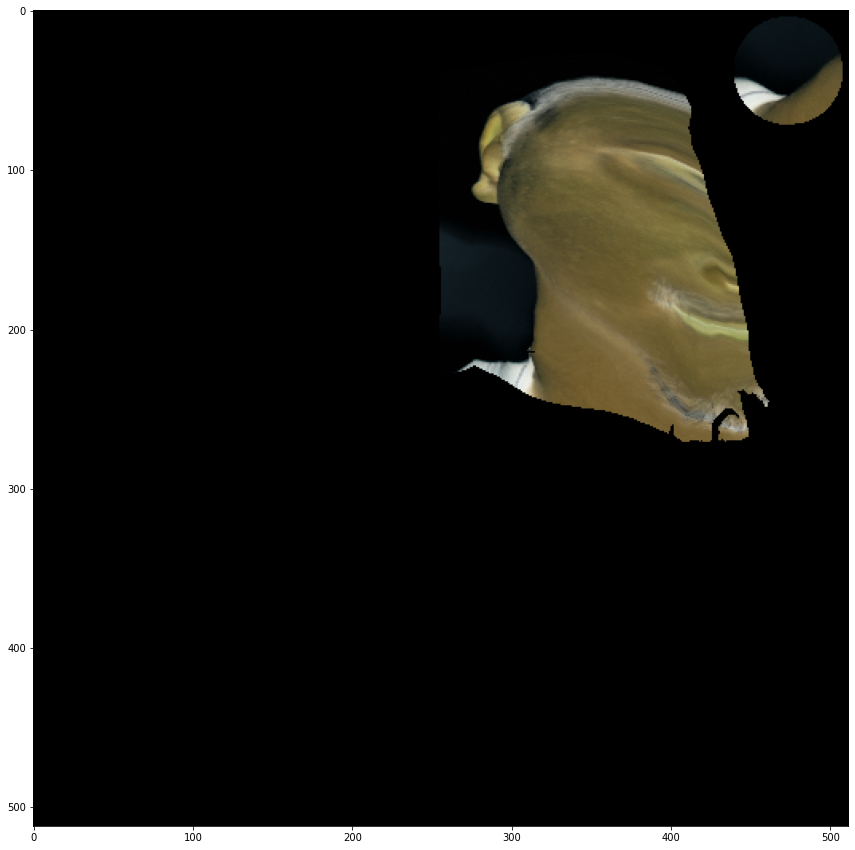

In [1]:
import os
import cv2
import sys
import argparse
import numpy as np
from psbody.mesh import Mesh
from psbody.mesh.meshviewer import MeshViewer
from utils.project_on_mesh import compute_texture_map
import matplotlib.pyplot as plt

# 정상 이미지
source_img_fname = '/content/drive/My Drive/VOCA-flame/hkim정면crop.png'
source_img = cv2.imread(source_img_fname)

# 제로포즈 메쉬
target_mesh = Mesh(filename="/content/drive/My Drive/animation_output/meshes/00000.obj")

target_mesh.set_vertex_colors('white')
target_scale = np.load('/content/drive/My Drive/FLAME-result/hkim정면crop_scale.npy')

texture_mapping = '/content/drive/My Drive/GTask/VOCA/FLAME/data/texture_data.npy'

out_path = '/content/drive/My Drive/animation_texture/'


if sys.version_info >= (3, 0):
  texture_data = np.load(texture_mapping, allow_pickle=True, encoding='latin1').item()
else:
  texture_data = np.load(texture_mapping, allow_pickle=True).item()
texture_map = compute_texture_map(source_img, target_mesh, target_scale, texture_data)

out_mesh_fname = os.path.join(out_path, os.path.splitext(os.path.basename(source_img_fname))[0] + '.obj')
out_img_fname = os.path.join(out_path, os.path.splitext(os.path.basename(source_img_fname))[0] + '.png')

print(out_img_fname)

cv2.imwrite(out_img_fname, texture_map)
target_mesh.vt = texture_data['vt']
target_mesh.ft = texture_data['ft']
target_mesh.set_texture_image(out_img_fname)
target_mesh.write_obj(out_mesh_fname)
#target_mesh.show()

fig = plt.figure(figsize=(30, 15))
plt.imshow((texture_map * 255).astype(np.uint8)) # (out * 255).astype(np.uint8)


print('*** hkim: done ***')